(Play-Space)=
# User Play Space

Use this notebook to interact with the shock Hugoniot data.

In [11]:
#@title Double-click to collapse code
%matplotlib inline
import os
from os.path import exists

# necessary subdirectories
if not os.path.isdir('database-user/'):
    os.mkdir('database-user')
    print('made local directory: database-user')

# Collect files needed to run this notebook in the cloud (e.g., Google CoLab)
use_local_files = True # prefer local files than GitHub repo (change to false to refresh from repo)

if use_local_files:
    if not exists('materials-data.csv'):
        # material database
        os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/materials-data.csv?raw=true -O materials-data.csv')
    if not exists('materials-new.csv'):
        # new material database entry
        os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/materials-new.csv?raw=true -O materials-new.csv')
    if not exists('IM_module.py'):
        # IM_modules for this notebook
        os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/IM_module.py?raw=true -O IM_module.py')
    if not exists('IM_app.py'):
        # IM_modules for this notebook
        os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/IM_app.py?raw=true -O IM_app.py')
    if not exists('PetaviusLangrenus_Poupeau_3000.png'):
        # IM_modules for this notebook
        os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/PetaviusLangrenus_Poupeau_3000.png?raw=true -O PetaviusLangrenus_Poupeau_3000.png')
    if not os.path.isdir('database-user/'):
        os.mkdir('database-user')
        print('made local directory: database-user')
    if not os.path.exists('database-user/Root-fused-silica.csv'):
        # fetch the file from the GitHub repo
        os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/database-user/Root-fused-silica.csv?raw=true -O database-user/Root-fused-silica.csv')
else:
    # refresh all the files from the github repo
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/materials-data.csv?raw=true -O materials-data.csv')
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/materials-new.csv?raw=true -O materials-new.csv')
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/IM_module.py?raw=true -O IM_module.py')
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/IM_app.py?raw=true -O IM_app.py')
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/PetaviusLangrenus_Poupeau_3000.png?raw=true -O PetaviusLangrenus_Poupeau_3000.png')
    os.system('wget --quiet https://github.com/ImpactsWiki/impact-tools-book/blob/main/im/database-user/Root-fused-silica.csv?raw=true -O database-user/Root-fused-silica.csv')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
from os.path import exists

# Impedance Match Calculation classes and functions
import IM_module as IM # classes and functions for this impedance match notebook


```{margin} 
Launch CoLab with the rocket icon at the top of the page to interact with the data
```
Launch CoLab

Run the notebook


## About the IM_module

The IM_module contains several function to interact with the shock Hugoniot data.
Use the command help(IM) to list the classes and functions.


In [12]:
# comment the command below for information about the module
#help(IM)

## Step 1: load the material-data.csv file

Load the material database with the following comment.
The parameters are stored in a DataFrame object called matdata.
The imat object contains indexing information for book-keeping purposes in the code.
If you want to change the format of the database, update the material indices function to preserve the code functionality.

For ease of use the materials database file uses g/cm3 and km/s, as is most common in the shockwave literature.

The file is converted to MKS when it is read in and all the functions are expecting MKS units.

In [13]:
# load the materials data table; change matfilename if not using default
matdata, imat = IM.ReadMaterials(matfilename='materials-data.csv')


## Plotting the data and fits

Examples of initializing material objects, fitting, and plotting functions.

Copper fit (mks) c0= 4215.878127973098  s1= 1.3163399223097854  s2= 0.0  d= 0.0
N=392. Fit stdev (km/s)=0.3071729810347356
Primary Hugoniot parameters c0,s1,s2,d= 3975.0 1.471 -5.008e-06 0.0


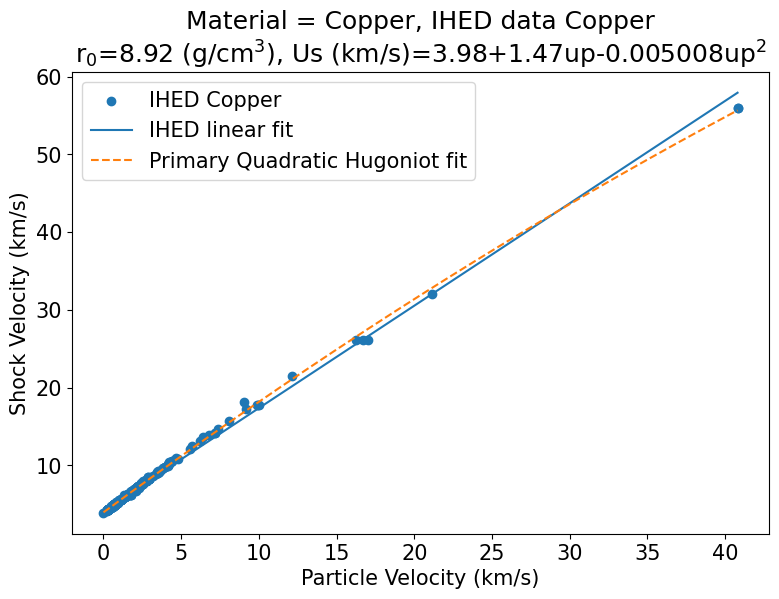

In [14]:
# Example of initializing a material object and plotting the Hugoniot

mat1 = IM.Material() # create material object named 'mat3'
matname='Copper' # material name in the material-data.csv file
mat1.DefineParamsID(matname,matdata,imat) # load the parameters for this material
# example of plotting a second set of IHED data and limiting the fit
mat1.GetIHED() # gather the IHED data for this material
mat1.PlotIHED() # plot the data and Hugoniot fits


In [15]:
# Example of initializing a material object and plotting the Hugoniot using 2 IHED datasets

# Note that the fit to basalt is for the high-pressure phase region only
mat3 = IM.Material() # create material object named 'mat3'
matname='Basalt-hpp-ulh' # material name in the material-data.csv file
mat3.DefineParamsID(matname,matdata,imat) # load the parameters for this material
# example of plotting a second set of IHED data and limiting the fit
# formflag=3 means fit the data with a universal liquid Hugoniot
# id2=636 means also gather the IHED data for material ID 626 (Vacaville basalt)
mat3.GetIHED(formflag=3,upmin=500,id2=636) 



Got IHED data:  Basalt 636 Basalt, Vacaville, R0 =  2.860 g/cc


In [17]:
# use help to see the parameters for each function
help(mat3.PlotIHED)

Help on method PlotIHED in module IM_module:

PlotIHED(savebool=False, fname='') method of IM_module.Material instance
    Plot IHED data and fit.
    Usage: PlotIHED(self,savebool=False,fname=''):
    Inputs: Optional 0 or 1 save PDF figure boolean.
            Optional figure name string. Default is 'IHED-plot-'+self.name+'-v'+__version__+'.pdf'



Basalt Basalt fit (mks) c0= 5397.022703758356  s1= 1.2796505146110337  s2= 2.550443303757193  d= 0.0004472590051925441
N=35. Fit stdev (km/s)=0.2712649008259699
Primary Hugoniot parameters c0,s1,s2,d= 5397.0 1.279 2.55 0.00044726


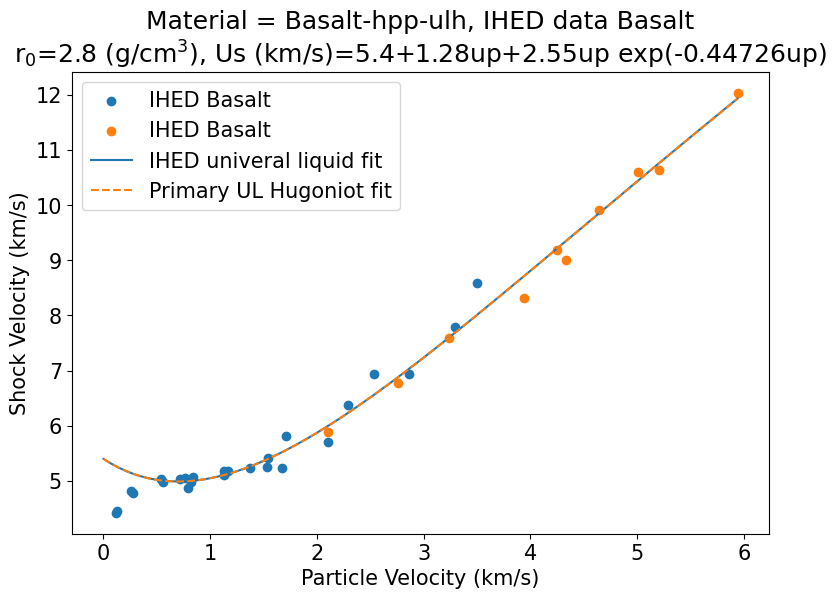

In [16]:
mat3.PlotIHED()

## Example Figure of Reshock Hugoniot and Isentrope

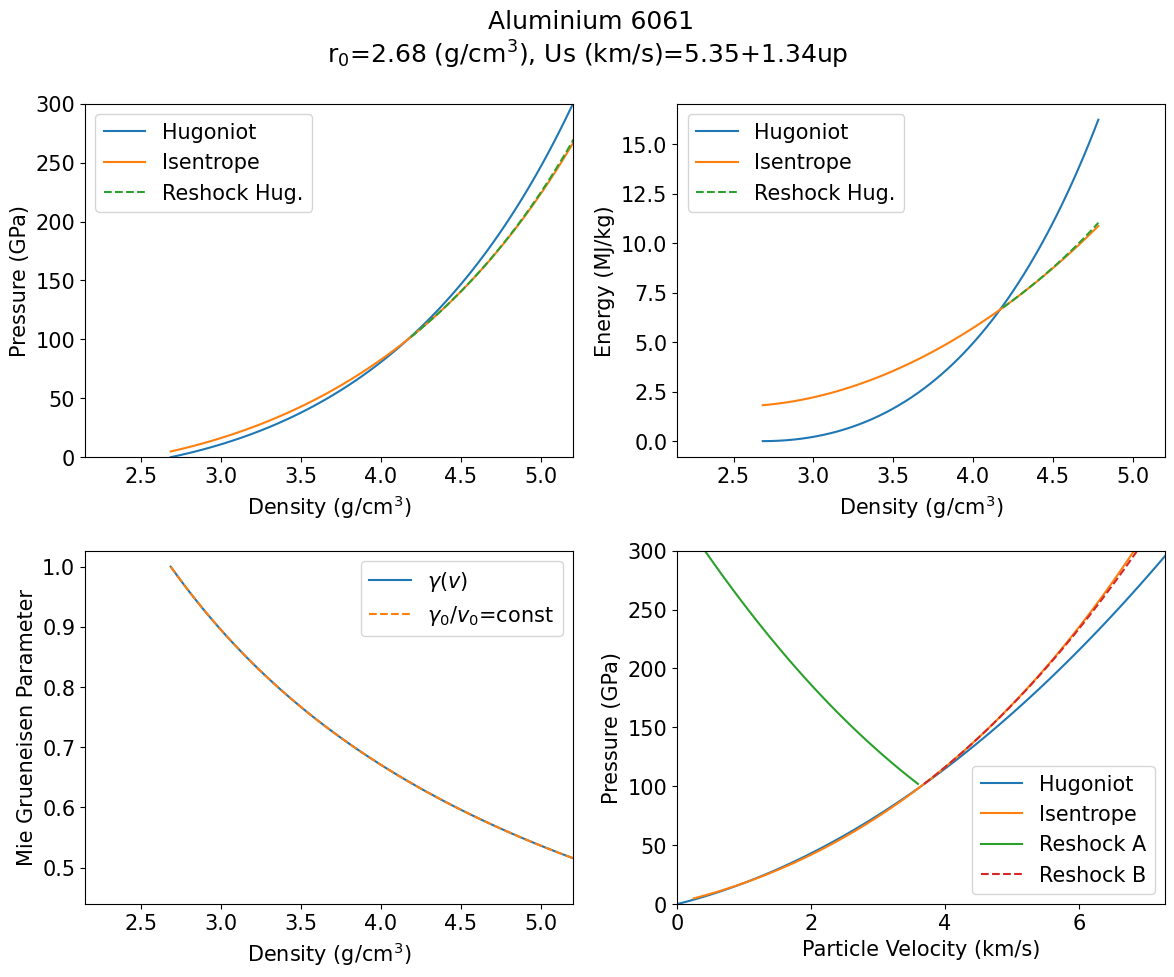

In [18]:
mat4 = IM.Material()
#mat4.DefineParamsID('Steel 304',matdata,imat)
mat4.DefineParamsID('Aluminium 6061',matdata,imat)
up =np.arange(101)/100.*10000
mat4.MakeHugoniot(up)
pstart=100.e9 # 1 GPa
mat4.im1.p = pstart
mat4.im1.v = 1/np.interp(pstart,mat4.hug.parr,1/mat4.hug.varr)
mat4.im1.up = np.interp(pstart,mat4.hug.parr,mat4.hug.uparr)
mat4.im1.e = np.interp(pstart,mat4.hug.parr,mat4.hug.earr)
mat4.PlotCurves(mat4.im1.p,usegmodelbool=True,impvel=mat4.im1.up*1.1)

Text(0, 0.5, 'Pressure (GPa)')

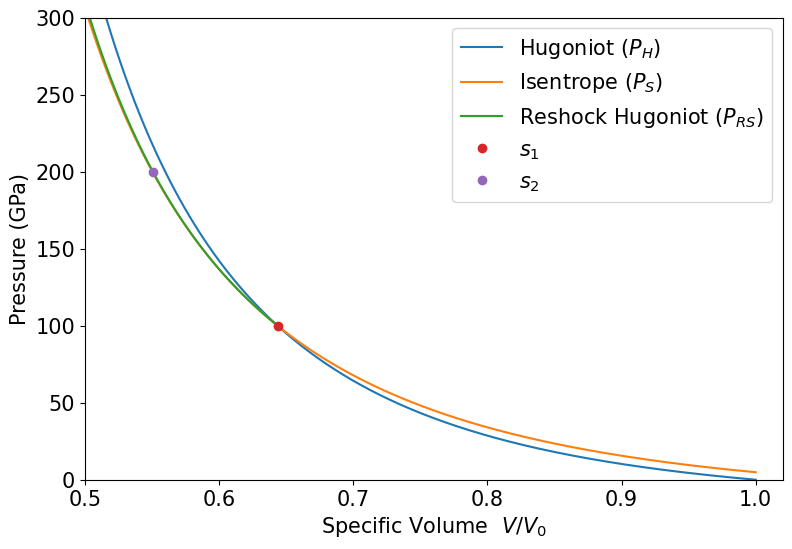

In [19]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (9,6)
plt.rc('font', size=15)
fig = plt.figure() 
plt.plot(mat4.hug.varr/mat4.v0,mat4.hug.parr/1.e9,label='Hugoniot ($P_H$)')
plt.plot(mat4.isen.varr/mat4.v0,mat4.isen.parr/1.e9, label='Isentrope ($P_S$)')
plt.plot(mat4.reshock.varr/mat4.v0,mat4.reshock.parr/1.e9, label='Reshock Hugoniot ($P_{RS}$)')
plt.plot(mat4.im1.v/mat4.v0,mat4.im1.p/1.e9,'o',label='$s_1$')

p2 = 200.e9
v2 = np.interp(p2,mat4.reshock.parr,mat4.reshock.varr)
plt.plot(v2/mat4.v0,p2/1.e9,'o',label='$s_2$')

plt.ylim((0,300))
plt.xlim((0.5,1.02))
plt.legend()
plt.xlabel('Specific Volume  $V / V_0$')
plt.ylabel('Pressure (GPa)')
#fname='Save-fig.png'
#plt.savefig(fname,dpi=300)